# Set up plates for a duckweed genotypes x media growth assay
Note that you'll need to be connected to a Jubilee machine to run these cells

## 0. Import packages and libraries

In [1]:
import os
from pathlib import Path
import json
import time
import ipywidgets as widgets
import pandas as pd

from science_jubilee.Machine import Machine
from science_jubilee.decks.Deck import Deck
from science_jubilee.tools.Syringe import Syringe
from science_jubilee.tools.Loop import Loop
from science_jubilee.tools.Camera import Camera
# import utils.DuckbotExptSetupUtils as exp

%load_ext autoreload
%autoreload 2

In [2]:
# Initialize your connection to the machine
m = Machine(address="jubilee.local")
deck = m.load_deck("lab_automation_deck_blair")

loop = Loop(0, "Loop")
camera = Camera(3, "Camera")
syringe = Syringe(4, "Syringe", "10cc_syringe")
t = Camera(0, "test")

m.load_tool(loop)
m.load_tool(camera)
m.load_tool(syringe)

## 1. Select config files

### Select experimental config file

In [3]:
root_dir = Path(os.path.abspath('')).resolve().parent
config_file_dir = os.path.join(root_dir, "experiments")

config_opts = os.listdir(config_file_dir)
expt_choice = widgets.Dropdown(options = config_opts)
display(expt_choice)

Dropdown(options=('GrowthAssayCaseStudy', 'TestExperiment'), value='GrowthAssayCaseStudy')

In [4]:
print(f"You selected: *{expt_choice.value}*")
print("If this is not correct re-select before continuing")

You selected: *TestExperiment*
If this is not correct re-select before continuing


### Visualize and confirm plate set up

#### Run this cell to print a visualization of your experimental design. If this isn't as expected go back and re-run the config file selection cell or go back and directly edit your experimental config file and start again

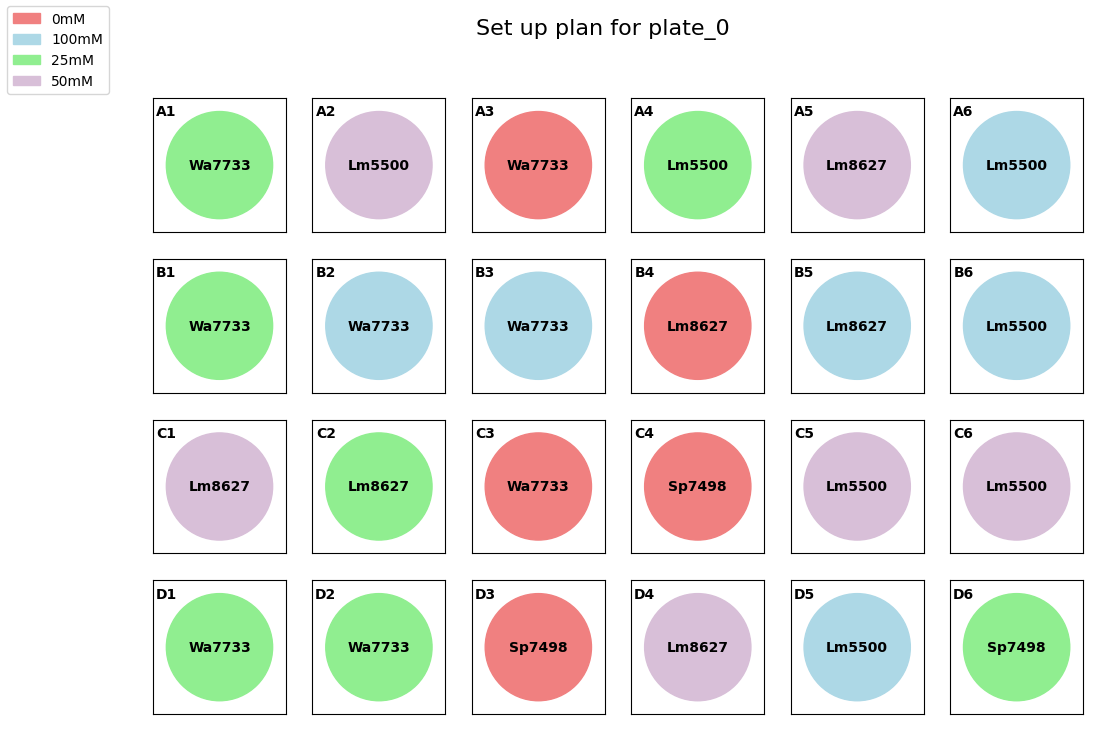

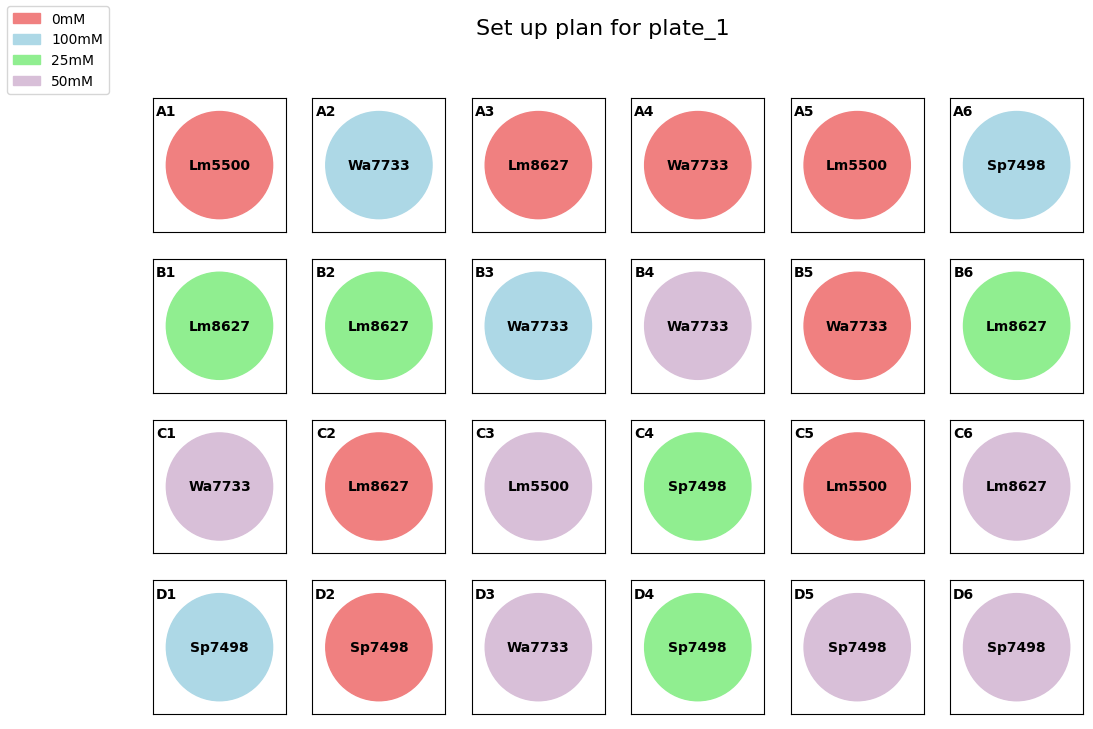

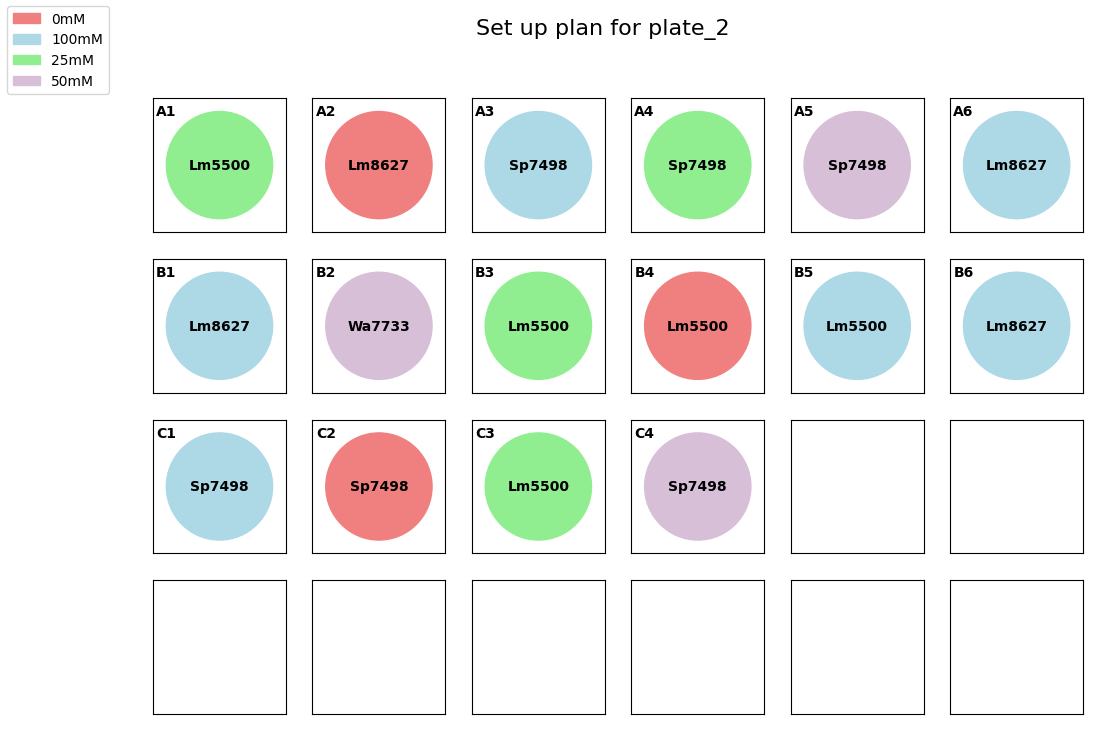

In [5]:
%matplotlib inline
from utils.GrowthAssayHelpers import visualize_plate_setup

experimental_config_file = os.path.join(config_file_dir, expt_choice.value, f'{expt_choice.value}.json')
visualize_plate_setup(experimental_config_file)

## 2. Label 24-well plates and add to machine
Follow the instructions that are printed when you run the cells

#### Label Plates and add plates to machine

In [6]:
with open(experimental_config_file, 'r') as f:
    experiment_data = json.load(f)
plate_info = experiment_data['sample_info']
df = pd.DataFrame(plate_info)
num_plates = df.plate.nunique()

print("This experiment requires {} 24-well plate(s)".format(num_plates))
print("----")
lst = list(range(1,num_plates + 1))
for n in lst:
    print("Label a plate with experiment ID or initials and 'plate {}'".format(n))
print("----")
print ("Place the 24-well plate(s) in the jubilee".format(num_plates))
print ("Start at position 1 and fill empty plate slots in order")

This experiment requires 3 24-well plate(s)
----
Label a plate with experiment ID or initials and 'plate 1'
Label a plate with experiment ID or initials and 'plate 2'
Label a plate with experiment ID or initials and 'plate 3'
----
Place the 24-well plate(s) in the jubilee
Start at position 1 and fill empty plate slots in order


In [7]:
# Define the labware you will be using for this experiment.
# Add the media reservoir; I'll swap out petri dishes to slot 0
reservoir = deck.load_labware("generic_petri_dish_100ml", 0)

# We'll use three 24-well plates.
plate1 = deck.load_labware("greiner_24_wellplate_3300ul", 1)
plate2 = deck.load_labware("greiner_24_wellplate_3300ul", 2)
plate3 = deck.load_labware("greiner_24_wellplate_3300ul", 3)

## 3. Dispense media
Run cells, making sure to follow the instructions that print when your run the cells

In [8]:
# Pickup syringe
m.pickup_tool(syringe)

In [21]:
syringe.dispense(2)

In [ ]:
#Retrieve absolute positions of wells from a library and then add those coordinatest to the plate set up dataframe
df_with_well_coords = pp.add_well_coords_to_df_from_sample_data_dict(sample_data_dict)
    
#Reorganizes dataframe to create machine instructions sorted by media-type
media_dicts = pp.pull_list_of_well_coord_dicts_by_dfcolumn(df_with_well_coords, 'media')

In [ ]:
#Pick up syringe toolhead
media_syringe = tool_positions['media_syringe']
m.toolChange(media_syringe)

In [ ]:
# Send machine instructions
for media in media_dicts:
    m.moveTo(x=0,y=0,z=25)
    print(f"Please ensure {media['media']} is available in the machine before continuing.")
    print("Change syringe and/or needle if desired")
    while True:
        value = input("Enter 'YES' to confirm that the correct media is in position")
        if value != "YES":
            print("Please confirm")
        else:
            break
    exp.dispense_to_wells(m, media["well-coords"], dispense_offset, dispenses_per_syringe_fill, media_reservoir, media_dispensing_z_dict)

## 4. Transfer duckweed

### Transfer option 1: Automated transfer with inoculation loop

In [ ]:
#pop the bed down to avoid any collisions on tool change
m.moveTo(z=50)

In [ ]:
# pick up the innoculation loop
inoculation_loop = tool_positions['inoculation_loop']
m.toolChange(inoculation_loop)
m.moveTo(x=duckweed_reservoir_loc[0], y=duckweed_reservoir_loc[1])

In [ ]:
# pop the bed down to avoid collisions after probing 
m.moveTo(z=50)

### Change the next cell for right angle vs standard inoculation loop!

In [ ]:
# Inoculation Loop Transfer
# The machine will move after running this cell
exp.inoculation_loop_transfer(m, df, duckweed_reservoir_loc, inoculation_loop_z_dict)

In [ ]:
# pop bed down to access labware
m.moveTo(z=100)

### Consecutive Tranfser Passes
These cells will find any wells missing duckweed, and then prompt you to swap in the appropriate duckweed reservoir for transfer. Re-run the cells as many times as you like until you are satisfied with the results

In [ ]:
m.toolChange(3)
exp.check_wells(m, df_with_well_coords)

In [ ]:
# debug cells
f = getFrame()
showFrame(f)

In [ ]:
f = getFrame()
frame, wellData = getSingleWell(f, minR=350, maxR=500)
showFrame(frame)
# crop, crop_data = exp.well_check_circle_crop(f)
# showFrame(crop)


In [ ]:
frond_check = exp.identify_fronds(crop)
print(frond_check)

### change next cell based on right angle or standard inoculation loop!

In [ ]:
exp.fill_empty_wells(m, df_with_well_coords, duckweed_reservoir_loc, inoculation_loop_z_dict)

### Transfer option 2: Manual transfer
Run this cell to generate written instructions of what duckweed genotypes should be in which wells. 

In [ ]:
#Manual transfer

grouped_df = df.groupby('genotype')
for field_value, sample_df in grouped_df:
    print("Place container of duckweed type **{0}** into jubilee and ensure lid is open".format(field_value))
    for index,s in sample_df.iterrows():
        plate = s["Plate"]
        well = s["Well"]
        print(f"Transfer {field_value} to plate {plate}, well {well}")
    input()

#### Record any extra notes you'd like to add
Write down any notes about today's set up that you would like to be recorded in the set up file 

In [ ]:
notes = input()
exp.add_input_to_json(notes, "Set_up_notes", expt_setup_filepath)